In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("/content/homeprices_banglore.csv")

In [4]:
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [44]:
df.shape

(20, 3)

In [6]:
df.sample(5)

,area,bedrooms,price
11,2785,4,140.0
5,1170,2,38.0
3,1521,3,75.0
10,1800,3,82.0
7,3300,4,155.0


In [8]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_x = sx.fit_transform(df.drop('price', axis=1))
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [9]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

## Implement Batch Gradient Descent
- Taking the whole dataframe at once and use it to train the model
---



In [17]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

  number_of_features = X.shape[1] #Getting the number of columns

  #initializing weight and bias values
  w = np.ones(shape = (number_of_features))
  b = 0
  total_samples = X.shape[0] #number of rows

  cost_list=[]
  epoch_list=[]

  for i in range(epochs):

    y_predicted = np.dot(w, X.T) + b

    # Get the derivative of w and b
    w_gradient = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
    b_gradient = -(2/total_samples)*np.sum(y_true-y_predicted)

    # update the w and b
    w = w - learning_rate * w_gradient
    b = b - learning_rate * b_gradient

    # Calculate the loss: Mean square Error
    cost = np.mean(np.square(y_true - y_predicted))

    if i%10 == 0:
      cost_list.append(cost)
      epoch_list.append(i)

  return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0],), 500)

print(f"Wieght: {w}, Bias: {b}, Loss: {cost}")

print("Loss list: ", cost_list)
print("Epoch List: ", epoch_list)





Wieght: [0.70712464 0.67456527], Bias: -0.23034857438407427, Loss: 0.0068641890429808105
Loss list:  [0.2768777174681, 0.16573507027671064, 0.10212908135956808, 0.06564235879682481, 0.04463022365578522, 0.03245122421764872, 0.025317339083010492, 0.021067914076635823, 0.01847041893523527, 0.016821657535428185, 0.015720331469182485, 0.014937329116527901, 0.014341749105819087, 0.0138587099774241, 0.013445288028074867, 0.013076793952344979, 0.012738945874049962, 0.012423405193086517, 0.012125230310262438, 0.011841424159334757, 0.011570105565415722, 0.011310036391930275, 0.01106035160957391, 0.010820405104702651, 0.010589681505198633, 0.010367745666240432, 0.010154213642862602, 0.009948735925187012, 0.009750987675343718, 0.009560662965348804, 0.009377471304274599, 0.009201135478234784, 0.009031390146006546, 0.008867980872255637, 0.008710663416728342, 0.008559203175573597, 0.008413374715338717, 0.008272961365501463, 0.008137754849850727, 0.00800755494527638, 0.007882169161242129, 0.007761412

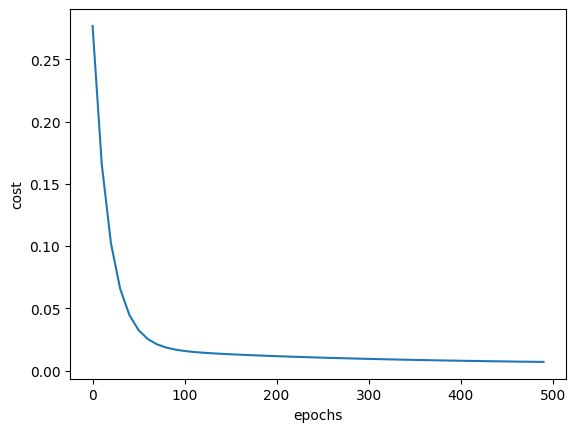

In [18]:
# Graph between loss and number of epochs
plt.xlabel("epochs")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

In [20]:
# Create Predict function
def predict(area, bedrooms, w, b):

  scaled_x = sx.transform([[area, bedrooms]])[0] # scale the value of area and bedroom with the range of 0 and 1
  scaled_price = w[0]*scaled_x[0] + w[1]*scaled_x[1] + b

  price = sy.inverse_transform([[scaled_price]])[0][0] # reverese scaling the predict value from 0 to 1 range to actual value

  return price

predict(2600, 4, w, b) # w and b values comming from the batch_gradient_descent function

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [21]:
predict(1000, 2, w, b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.253094462442355

In [24]:
predict(2000, 4, w, b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


108.70412125185153

# Implement Stochastic Gradient Descent
- Taking 1 random sample and training the model with it

In [25]:
import random

In [51]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

  number_of_features = X.shape[1] #Getting the number of columns

  #initializing weight and bias values
  w = np.ones(shape = (number_of_features))
  b = 0
  total_samples = X.shape[0] #number of rows

  cost_list=[]
  epoch_list=[]

  for i in range(epochs):

    random_index = random.randint(0, total_samples-1)
    sample_x = X[random_index]
    sample_y = y_true[random_index]

    y_predicted = np.dot(w, sample_x.T) + b

    # Get the derivative of w and b
    w_gradient = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
    b_gradient = -(2/total_samples)*np.sum(y_true-y_predicted)

    # update the w and b
    w = w - learning_rate * w_gradient
    b = b - learning_rate * b_gradient

    # Calculate the loss: Mean square Error
    cost = np.mean(np.square(sample_y - y_predicted))

    if i%10 == 0:
      cost_list.append(cost)
      epoch_list.append(i)

  return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0],), 1000)

w_sgd, b_sgd, cost_sgd

(array([2.3335312 , 1.71515843]), -1.3389919891555346, 0.6001521978913649)

In [52]:
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

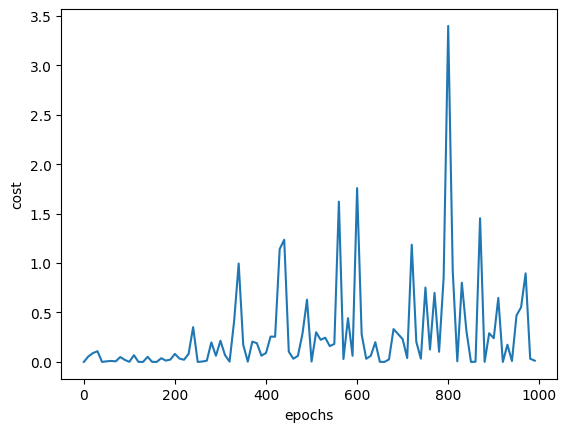

In [53]:
# Graph between loss and number of epochs
plt.xlabel("epochs")
plt.ylabel("cost")
plt.plot(epoch_list_sgd, cost_list_sgd)

## Implement Mini Batch Gradient Descent
- Making small batches of dataframe random and training the all batch in each epochs

In [70]:
def mini_batch_gradient_descent(X, y_true, epochs, batch_size, learning_rate = 0.01):

  number_of_features = X.shape[1] #Getting the number of columns

  #initializing weight and bias values
  w = np.ones(shape = (number_of_features))
  b = 0
  total_samples = X.shape[0] #number of rows

  cost_list=[]
  epoch_list=[]


  for i in range(epochs):

    # randomly arranging the index values
    random_indices = np.random.permutation(total_samples)
    X_temp = X[random_indices] #arranging the values of x and according to random indices
    y_temp = y_true[random_indices]

    for j in range(0, total_samples, batch_size):


        # Taking random samples from the x and y using the random index value
        sample_x = X_temp[j:j+batch_size]
        sample_y = y_temp[j:j+batch_size]

        y_predicted = np.dot(w, sample_x.T) + b

        # Get the derivative of w and b
        w_gradient = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_gradient = -(2/total_samples)*np.sum(sample_y-y_predicted)

        # update the w and b
        w = w - learning_rate * w_gradient
        b = b - learning_rate * b_gradient

        # Calculate the loss: Mean square Error
        cost = np.mean(np.square(sample_y - y_predicted))

    if i%10 == 0:
      cost_list.append(cost)
      epoch_list.append(i)

  return w, b, cost, cost_list, epoch_list

w_mb, b_mb, cost_mb, cost_list_mb, epoch_list_mb = mini_batch_gradient_descent(scaled_x,
                                                                          scaled_y.reshape(scaled_y.shape[0],), 500, 5)

print(f"Wieght: {w_mb}, Bias: {b_mb}, Loss: {cost_mb}")

print("Loss list: ", cost_list_mb)
print("Epoch List: ", epoch_list_mb)



Wieght: [0.70711905 0.67454477], Bias: -0.23036952192850105, Loss: 0.012754927515386674
Loss list:  [0.15513438663494195, 0.08697785030620817, 0.06347905708704102, 0.045640684658820166, 0.034631378842621706, 0.02633825692451256, 0.012978592633191824, 0.00927065498013342, 0.0313354064434655, 0.02771271803233078, 0.022917217076617074, 0.004157081036012497, 0.020293218347268733, 0.008106769668840153, 0.0065622761608706975, 0.00676089209181953, 0.021781261021380383, 0.006410308852176139, 0.004755251586430727, 0.009525538698507557, 0.004145117221410167, 0.013369861173089711, 0.00463491056588956, 0.003379591660028279, 0.00331673788687507, 0.006497950877626836, 0.011631170560175303, 0.005527243648311362, 0.008584466443929925, 0.02529974066970086, 0.0030132034080091463, 0.00501970964945744, 0.010600535633600455, 0.0034169800944677934, 0.01007734556019469, 0.005557001427939662, 0.010281986054988018, 0.014670181689635669, 0.002383085167973236, 0.002408746232945614, 0.003180138071798756, 0.001770

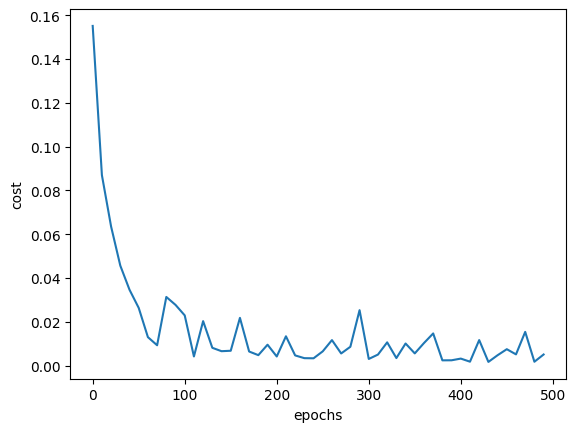

In [71]:
# Graph between loss and number of epochs
plt.xlabel("epochs")
plt.ylabel("cost")
plt.plot(epoch_list_mb, cost_list_mb)